# Training Happy Singh's Sukimo bot


Happy Singh has noted all weight and diameter of apples and oranges in a csv file. This file comprise our dataset. We need to load this dataset into our program
But how do we read the file in python? The pandas package provides function read_csv for this purpose.
In order to use this function. we must import it our code [Note: The dataset was extended after workshop]

In [1]:
from pandas import read_csv

To use the data in code, it must be stored in a variable. The NUMerical PYthon (abbv. as numpy) provides an efficient way of storing large data in objects called numpy arrays. Unlike pandas, entire numpy pakage must be imported. The type of variable that read_CSV returns, is known to numpy only

In [2]:
import numpy as np

In [3]:
apple_orange = read_csv('apple-orange-dataset.csv')

Let's glance through our data

In [4]:
apple_orange

,label,weight,diameter
0,1,136,10.557432
1,1,192,11.292246
2,1,112,10.120368
3,1,185,8.786955
4,1,129,10.070343
...,...,...,...
414,1,150,18.262581
415,1,122,9.105190
416,1,58,8.688009
417,1,50,6.881814


In [5]:
apple_orange.head()

,label,weight,diameter
0,1,136,10.557432
1,1,192,11.292246
2,1,112,10.120368
3,1,185,8.786955
4,1,129,10.070343


### Extracting labels

In [6]:
y = apple_orange['label']

In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

### Extracting Features 
Features weight and diameter, can be stored in a 2D array or matrix say X

In [8]:
features = ['weight','diameter']
X = apple_orange[features]

In [9]:
X.head()

,weight,diameter
0,136,10.557432
1,192,11.292246
2,112,10.120368
3,185,8.786955
4,129,10.070343


# Visualizing the data
We can plot a graph of apples and oranges in 2D plane. For this we need apples and oranges in separate variables

If you understood how apple_orange[['column_name']] works, its worth to know the following trick.

In [10]:
apple_orange[apple_orange['label'] == 1]

,label,weight,diameter
0,1,136,10.557432
1,1,192,11.292246
2,1,112,10.120368
3,1,185,8.786955
4,1,129,10.070343
...,...,...,...
414,1,150,18.262581
415,1,122,9.105190
416,1,58,8.688009
417,1,50,6.881814


In [11]:
apples = apple_orange[apple_orange['label'] == 1 ]

Feeling confident? Go ahead and do the same for oranges.

In [12]:
oranges = apple_orange[apple_orange['label'] == 0 ]

The best way to find patterns in data is by plotting its graph. Here comes matplotlib package. It provides a fn plot(x,y) in a subpackage pyplot.Lets import it.

In [13]:
import matplotlib.pyplot as plt

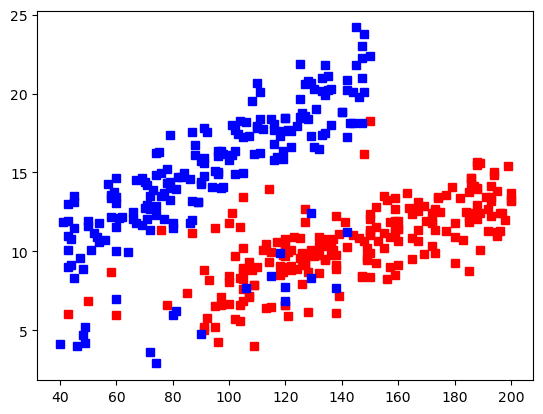

In [16]:
plt.plot(apples['weight'],apples['diameter'], 'rs')
plt.plot(oranges['weight'],oranges['diameter'],'bs')
plt.show()

# Selecting a Classifier
In order to classify apples and oranges we need to a classifier. We learnt about K-Nearest Neighbour classifier in the seminar.

In [18]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(penalty="l2")

# Train Test Split

Our dataset is sufficiently large. So we will split the dataset into training data (say X_train, y_train) and testing data (say X_test, y_test) To ease up the task we can use the train_test_split() function from sklearn's cross_validation subpackage.

In [24]:
from sklearn.model_selection import train_test_split

train_test_split is a special function. It can return multiple arrays at a time! Along with arrays, it takes test_size as argument.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4,random_state=2)

X_train and y_train now contains 60% of the X and y while X_test and y_test 40% since we used test_size=0.4

Let's generate the model with fit() function and predict labels of X_test with predict()

In [26]:
model.fit(X_train, Y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [29]:
Y_test.head()

146    1
223    0
193    1
305    0
188    1
Name: label, dtype: int64

### Accuracy
To check accuracy of predictions, we will use accuracy_score fn from metrics subpackage in sklearn

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
100*accuracy_score(y_pred, Y_test)

93.45238095238095

In [32]:
from sklearn.metrics import precision_score

print(precision_score(Y_test, y_pred))

0.9523809523809523


In [33]:
from sklearn.metrics import recall_score

print(recall_score(Y_test, y_pred))

0.9195402298850575


In [36]:
print((2 * precision_score(Y_test, y_pred) * recall_score(Y_test, y_pred)) / (precision_score(Y_test, y_pred) + recall_score(Y_test, y_pred)))

0.935672514619883


In [34]:
from sklearn.metrics import f1_score

print(f1_score(Y_test, y_pred))

0.935672514619883
